# Setup do Projeto

#### O Objetivo dessa POC
* Verificar os candidatos eleitos 
* Verificar se os candidatos eleitos são os que mais investiram
* Quanto preciso investir para ser eleito?

## Setup do Projeto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

## Carregando o Dataset de Eleição Consolidado

In [2]:
df = pd.read_csv("datasets/Eleicao.csv", sep=";")

In [3]:
df.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CANDIDATO  47 non-null     object
 1   SITUACAO   47 non-null     int64 
 2   DESPESAS   47 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
df.head(20)

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300
5,Susan Sanders,0,200
6,Anthony Harris,1,1800
7,Philip Richardson,1,1700
8,Eugene Phillips,0,300
9,Mildred Morris,1,1800


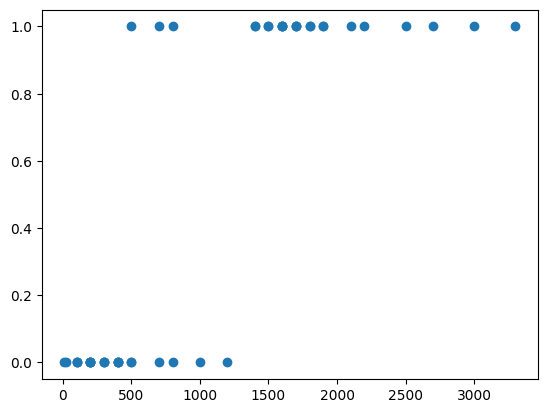

In [6]:
plt.scatter(df.DESPESAS, df.SITUACAO);

### Correlação entre os dados

In [7]:
np.corrcoef(df.SITUACAO, df.DESPESAS)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

/var/folders/ht/zw2nx83j6w387qgthkq66lg80000gn/T/ipykernel_55328/3784545759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,SITUACAO,DESPESAS
SITUACAO,1.000000,0.812187
DESPESAS,0.812187,1.000000


* 0.8 é uma correlacão forte. 
* Ou seja, sim, existe uma correlacão entre quem investe mais e quem ganha as eleições

In [9]:
X = df.DESPESAS.values

* Transformando o X em uma matriz

In [10]:
X = X[:, np.newaxis]

In [11]:
Y = df.SITUACAO.values

## Regressão Logistica

In [12]:
modelo = LogisticRegression()

In [13]:
modelo.fit(X, Y)

LogisticRegression()

* Consultando os coefientes

In [14]:
modelo.coef_

array([[0.00498364]])

In [15]:
modelo.intercept_

array([-4.60287217])

#### Encontrando a Linha de Melhor Ajuste no Grafico de Dispersão

In [16]:
def model(x):
    return 1/(1 + np.exp(-x))


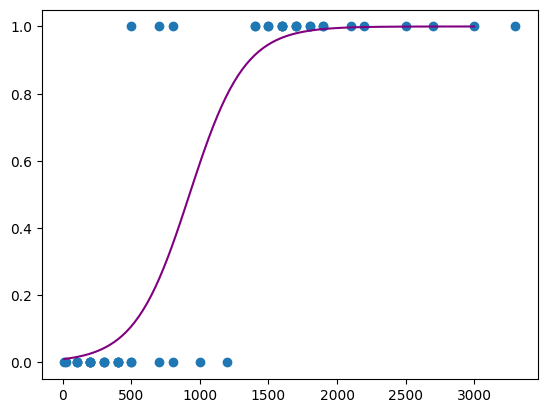

In [17]:
X_teste = np.linspace(10, 3000, 100)
r =  model(X_teste * modelo.coef_ + modelo.intercept_).ravel()

plt.scatter(X, Y)
plt.plot(X_teste, r, color="purple");

## Previsão de Investimentos de Novos Candidatos

### Carregando os Dados dos Novos Candidatos

In [18]:
df_novos = pd.read_csv("datasets/NovosCandidatos.csv", sep=";")

In [19]:
df_novos.describe()

,DESPESAS
count,7.000000
mean,872.857143
std,1081.429830
min,0.000000
25%,105.000000
50%,500.000000
75%,1200.000000
max,3000.000000


In [20]:
df_novos.head(10)

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


* No Dataset acima, temos os candidados (representados com a letra de A até G)
* Em seguida a quantidade de dinheiro que o mesmo pretende investir em campanha

#### Vamos executar o predict com base nas despesas

In [21]:
despesas = df_novos.DESPESAS.values

In [22]:
despesas = despesas.reshape(-1, 1)

In [23]:
previsoes_teste = modelo.predict(despesas)
previsoes_teste

array([0, 0, 0, 0, 0, 1, 1])

### Agregando os resultados logicos ao frame original para verificar os candidatos que mais tem chance de ganhar

In [24]:
df_novos = np.column_stack((df_novos, previsoes_teste))

In [25]:
df_novos

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)

* Podemos ver que o candidato F e G ganhariam a eleição com base no modelo preditivo de regressão